## Vergleich der Genauigkeiten

Dem Modell werden Bilder gegeben, von denen die richtigen Masken bekannt sind. Die vorhergesagten Masken des Modells werden dann abgeglichen mit den richtigen

### Laden des Modells und Generierung der Masken

In [1]:
import os
from model import *
from skimage import io
import numpy as np
from utils import *
import time

images = "data/cells/check/images"
truths = "data/cells/check/groundtruth"

model_path = "experiment/120.hdf5"
target_size = (512, 512)


model = unet(input_size=target_size + (1,))
model.load_weights(model_path)

generator = testGenerator(images, 2, target_size)

results = None
times = []
for e in generator:
  start = time.time()
  res = model.predict(e, 2, verbose=1)
  end = time.time()
  times.append(end - start)
  
  if results is None:
    results = res
    continue
  
  results = np.concatenate((results, res), axis=0)

print("Times: ", times)
print("Average time: ", np.mean(times))

saveResult("data/cells/check/results", results, merge=False)

d:\Programme\Anaconda\envs\facharbeit2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 256, 256, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

### Abgleichen der Masken mit der Wahrheit

mean structural similarity index: 0.7292288447703762
mean squared error: 6173.981666564941


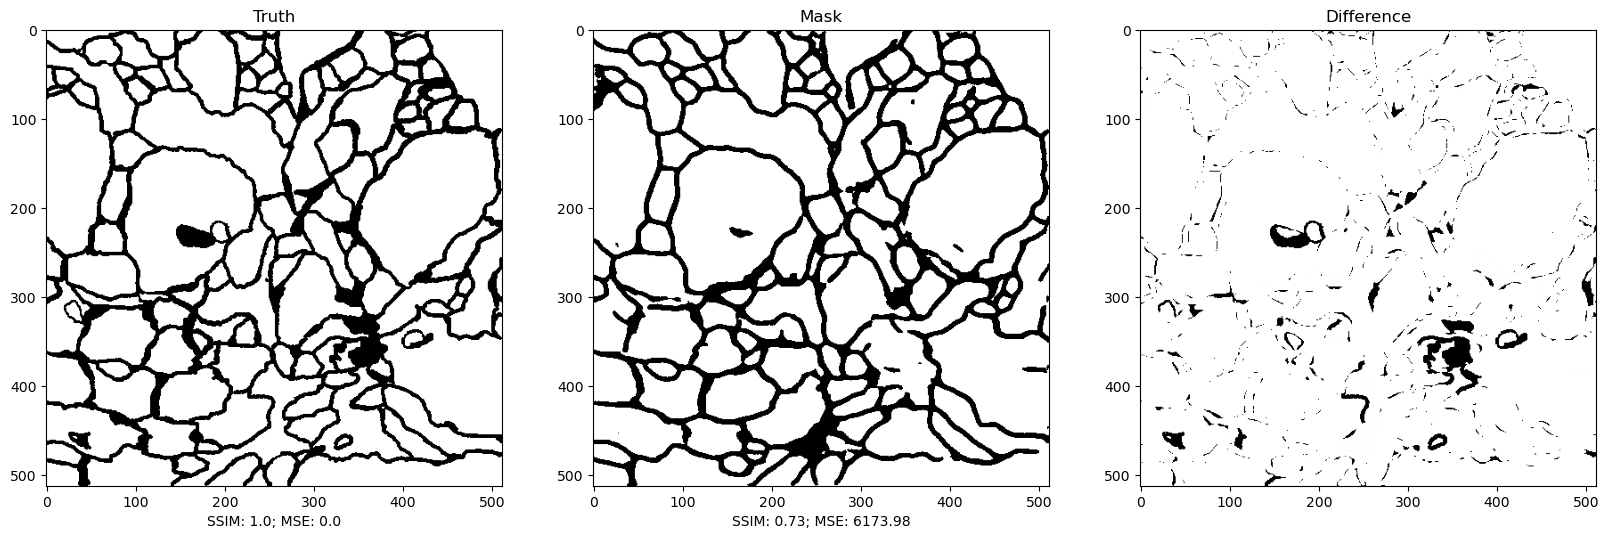

mean structural similarity index: 0.7677411697011699
mean squared error: 5162.182903289795


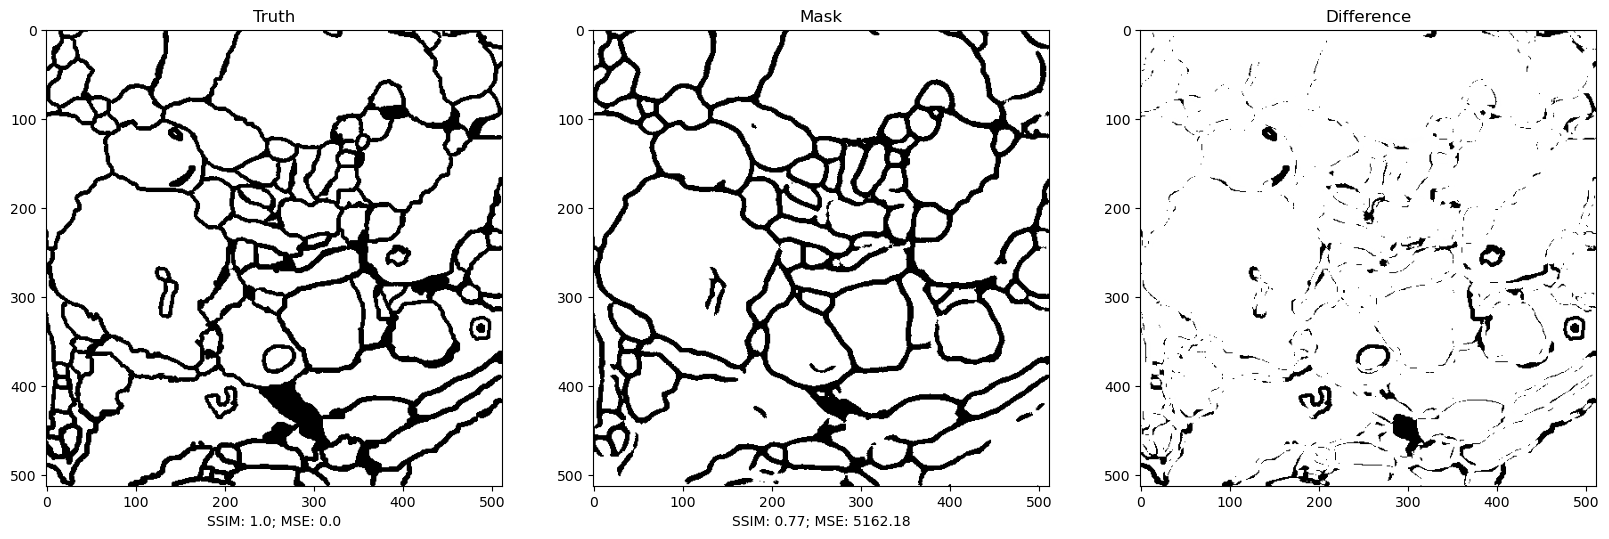

SSIMs:  [0.7292288447703762, 0.7677411697011699]
MSEs:  [6173.981666564941, 5162.182903289795]
Mean SSIM:  0.75
Mean MSE:  5668.08


In [3]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

ssims = []
mses = []

for i in range(2):
  mask = io.imread("data/cells/check/results/%d_predict.png" % i, as_gray=True)
  
  mask = mask / 255
  # klare Abgrenzung zwischen Zellen und Hintergrund
  mask[mask > 0.5] = 1
  mask[mask <= 0.5] = 0
  # zuschneiden auf passende Größe
  mask = normaliseImage(mask, target_size=target_size)
  mask = mask * 255
  mask = mask.astype(np.uint8)
  
  io.imsave(os.path.join("data/cells/check/results", "%d_predict_binarised.png" % i), mask)
  
  truth = io.imread("data/cells/check/groundtruth/%d.png" % i, as_gray=True)
  truth[truth == True] = 1
  truth[truth == False] = 0
  truth = normaliseImage(truth, target_size=target_size)
  truth = truth * 255
  truth = truth.astype(np.uint8)
  
  ssim_val = ssim(mask, truth)
  print("mean structural similarity index:", ssim_val)
  
  ssims.append(ssim_val)
  ssim_val = round(ssim_val, 2)
  
  mse_val = mse(mask, truth)
  print("mean squared error:", mse_val)
  
  mses.append(mse_val)
  mse_val = round(mse_val, 2)
  
  fig, axs = plt.subplots(1, 3, figsize=(20, 20))

  axs[0].imshow(truth, cmap='gray')
  axs[0].set_title('Truth')
  axs[0].set_xlabel(f"SSIM: {ssim(truth, truth)}; MSE: {mse(truth, truth)}")

  axs[1].imshow(mask, cmap='gray')
  axs[1].set_title('Mask')
  axs[1].set_xlabel(f"SSIM: {ssim_val}; MSE: {mse_val}")

  diff = (mask - truth)
  diff = np.invert(diff)
  
  axs[2].imshow(diff, cmap='gray')
  axs[2].set_title('Difference')

  plt.show()

print("SSIMs: ", ssims)
print("MSEs: ", mses)

print("Mean SSIM: ", round(np.mean(ssims), 2))
print("Mean MSE: ", round(np.mean(mses), 2))

### Anwendung auf unbekannte Bilder ohne Wahrheit

Bei den folgenden Bildern liegt nur das Basibild vor, es lässt sich also auf algorithmische Weise nur schwierig beurteilen, ob das Ergebnis richtig ist. Um eine Überprüfung zu beurteilen, werden die Masken in grüner Farbe über die Bildern gelegt.

Alle 30 Bilder werden unter "data/cells/test/" mit dem suffix "_predict.png" und "_overlay.png" abgespeichert.

In [17]:
image_path = "data/cells/test"

generator = testGenerator(image_path, target_size=target_size)

model = unet(input_size=target_size + (1,))
model.load_weights(model_path)

results = None
times = []
for e in generator:
  start = time.time()
  res = model.predict(e, 2, verbose=1)
  end = time.time()
  times.append(round(end - start, 4))
  
  if results is None:
    results = res
    continue
  
  results = np.concatenate((results, res), axis=0)

print("Times: ", times)
print("Average time: ", np.mean(times))

saveResult(image_path, results, merge=True)

d:\Programme\Anaconda\envs\facharbeit2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d_168 (Conv2D)             (None, 512, 512, 64) 640         input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_169 (Conv2D)             (None, 512, 512, 64) 36928       conv2d_168[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_28 (MaxPooling2D) (None, 256, 256, 64) 0           conv2d_169[0][0]                 
____________________________________________________________________________________________

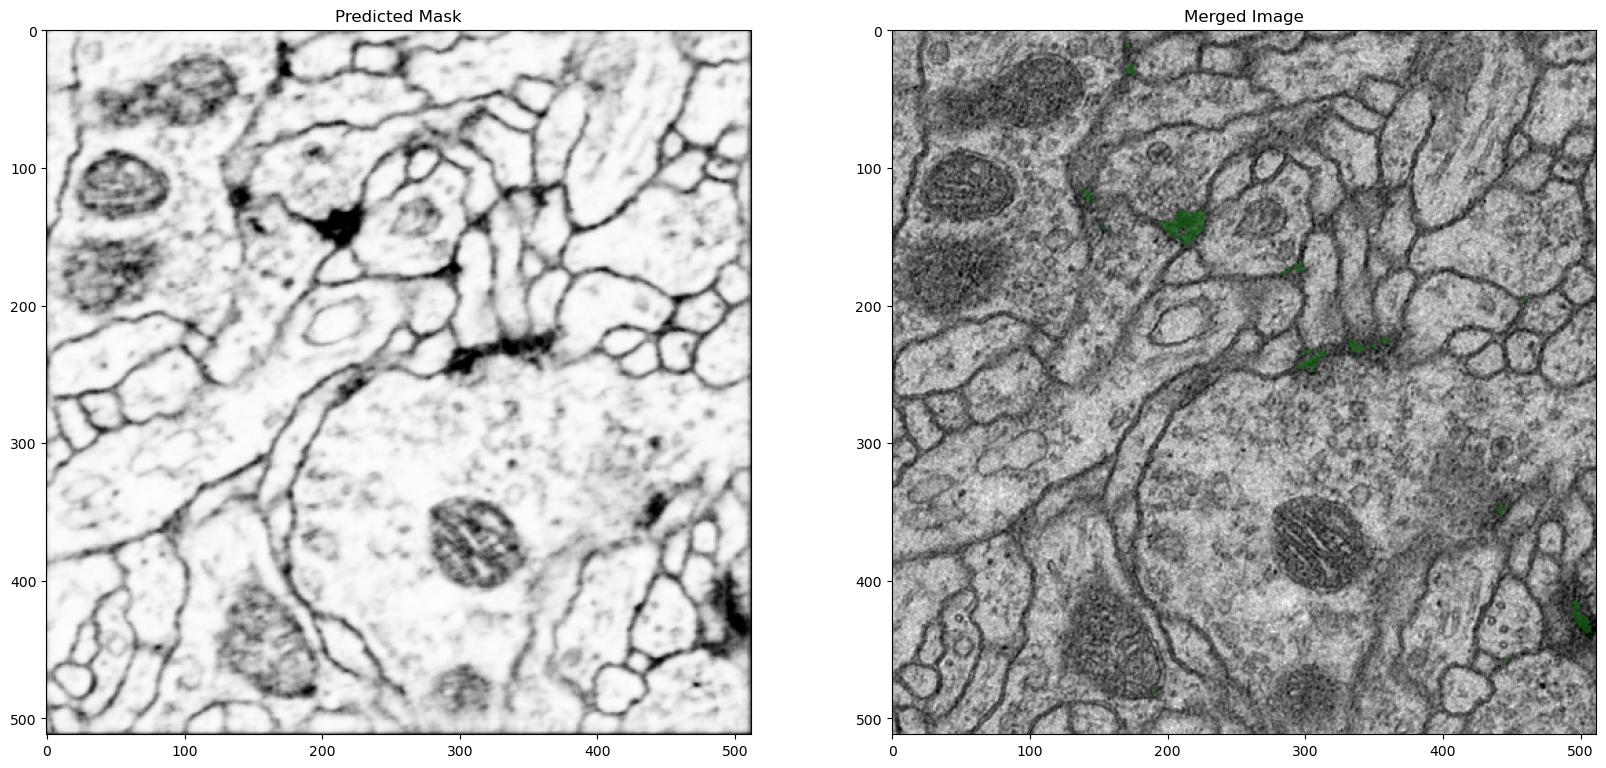

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20))

axs[0].imshow(io.imread(image_path + "\\28_predict.png", as_gray=True), cmap='gray')
axs[0].set_title('Predicted Mask')

axs[1].imshow(io.imread(image_path + "\\28_overlay.png", as_gray=False), cmap='gray')
axs[1].set_title('Merged Image')
plt.show()
